# Mots

In [1]:
!pip install pandas
!pip install spacy
!pip install plotly
!pip install wordcloud

In [8]:
import pandas as pd
import spacy
from collections import Counter
import nltk
from nltk.probability import FreqDist
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# Charger les données
df = pd.read_csv('labeled_data_with_predictions.csv')

# Charger le modèle SpaCy
nlp = spacy.load("en_core_web_sm")

# Stopwords personnalisés (ajouter ici les mots que vous voulez exclure)
custom_stopwords = {"https", "twitter", "elon", "musk", "people","quit","leave","stay", "like", "amp", "com", "user", "retweet", "go", "delete", "account"}

def clean_and_tokenize_spacy(text):
    """
    Utiliser SpaCy pour tokeniser et nettoyer le texte.
    """
    if not isinstance(text, str):
        return []
    doc = nlp(text.lower())
    tokens = [
        token.lemma_  # Récupérer le lemme (forme de base du mot)
        for token in doc
        if not token.is_stop  # Exclure les stopwords de SpaCy
        and token.is_alpha  # Exclure les caractères non alphabétiques
        and token.lemma_ not in custom_stopwords  # Exclure les mots personnalisés
    ]
    return tokens

# Appliquer le nettoyage et la tokenisation avec SpaCy
df['tokens'] = df['cleaned_tweet'].apply(clean_and_tokenize_spacy)

In [4]:
liste = []
for ligne in df['tokens']:
    liste = liste + ligne
liste = [token for token in liste if len(token) > 1]

In [5]:
fdist = FreqDist(liste)
fd = pd.DataFrame(fdist.most_common(30), columns = ["Word","Frequency"]).drop([0]).reindex()
fig = px.bar(fd, x="Word", y="Frequency")
fig.update_traces(marker_color='rgb(240,128,128)',marker_line_color='rgb(8,48,107)',marker_line_width=1.5, opacity=0.8)
fig.show()

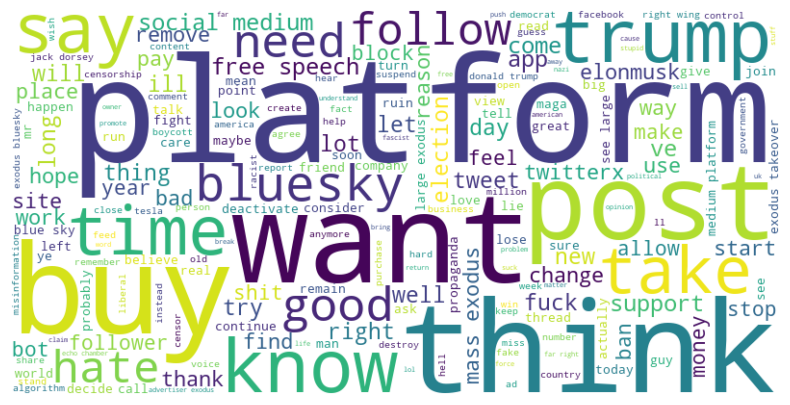

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(liste)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


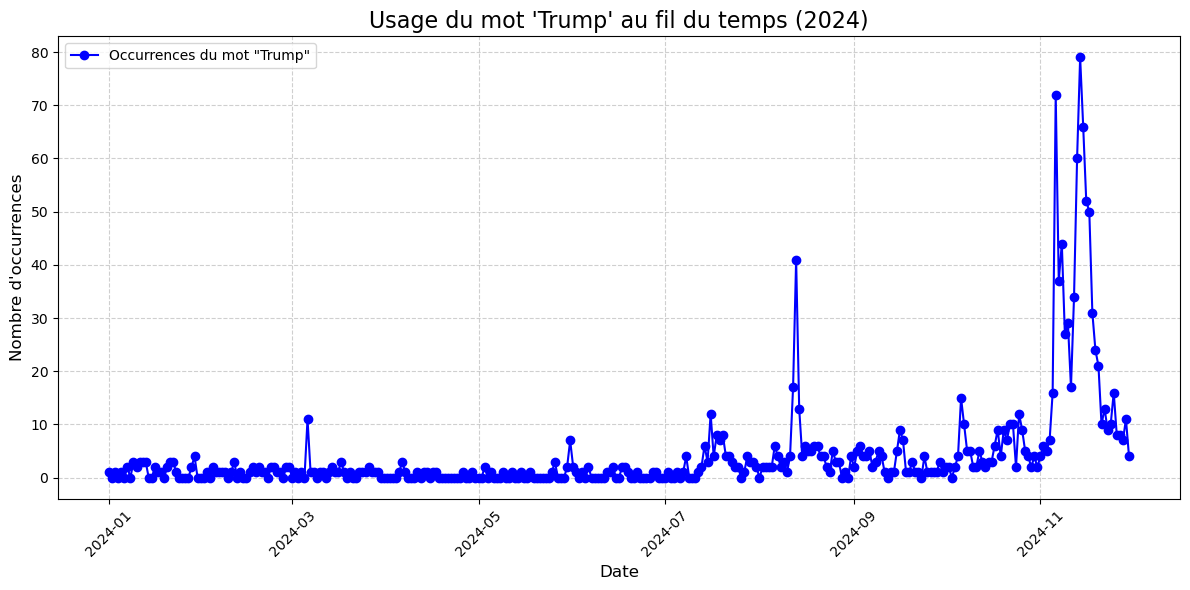

In [18]:
#on va prendre les mots qui reviennent le plus et on va regarder comment leur fréquence se répartit dans le temps

df_date = pd.read_csv('tweets_fusionnes.csv')
df_date['tokens'] = df_date['Content'].apply(clean_and_tokenize_spacy)
df_date['ConvertedDate'] = pd.to_datetime(df_date['ConvertedDate'])

mot_cle = "trump"
df_date['mention'] = df_date['tokens'].apply(lambda tokens: mot_cle in tokens)
occurrences = df_date[df_date['mention']].groupby(df_date['ConvertedDate'].dt.date).size()

# S'assurer que les jours sans données apparaissent
all_days = pd.date_range(start='2024-01-01', end='2024-11-30')
occurrences = occurrences.reindex(all_days, fill_value=0)

plt.figure(figsize=(12, 6))
plt.plot(occurrences.index, occurrences.values, marker='o', linestyle='-', color='blue', label='Occurrences du mot "Trump"')

# Ajouter des titres et légendes
plt.title("Usage du mot 'Trump' au fil du temps (2024)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)  # Incliner les dates pour une meilleure lisibilité
plt.legend()
plt.tight_layout()
plt.show()

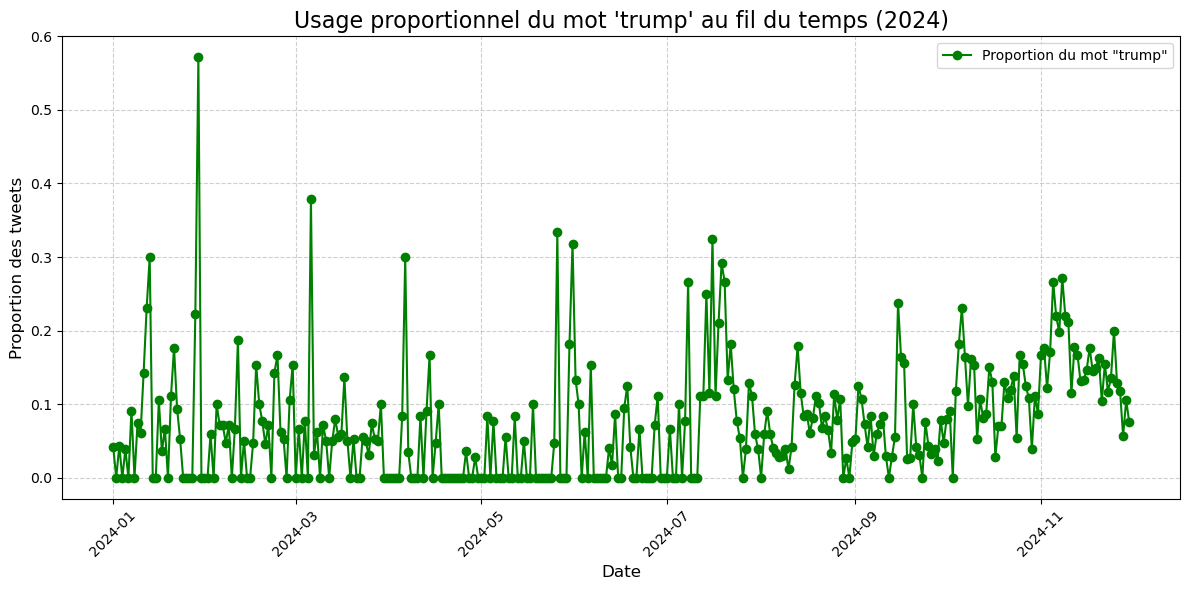

In [ ]:
#pondérons par le nombre de tweets afin de visualiser l'évolution de l'usage du mot 
total_tweets = df_date.groupby(df_date['ConvertedDate'].dt.date).size()
proportion = occurrences / total_tweets

proportion = proportion.reindex(all_days, fill_value=0)

plt.figure(figsize=(12, 6))
plt.plot(proportion.index, proportion.values, marker='o', linestyle='-', color='green', label='Proportion du mot "trump"')

# Ajouter des titres et légendes
plt.title("Usage proportionnel du mot 'trump' au fil du temps (2024)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Proportion des tweets", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)  # Incliner les dates pour une meilleure lisibilité
plt.legend()
plt.tight_layout()
plt.show()



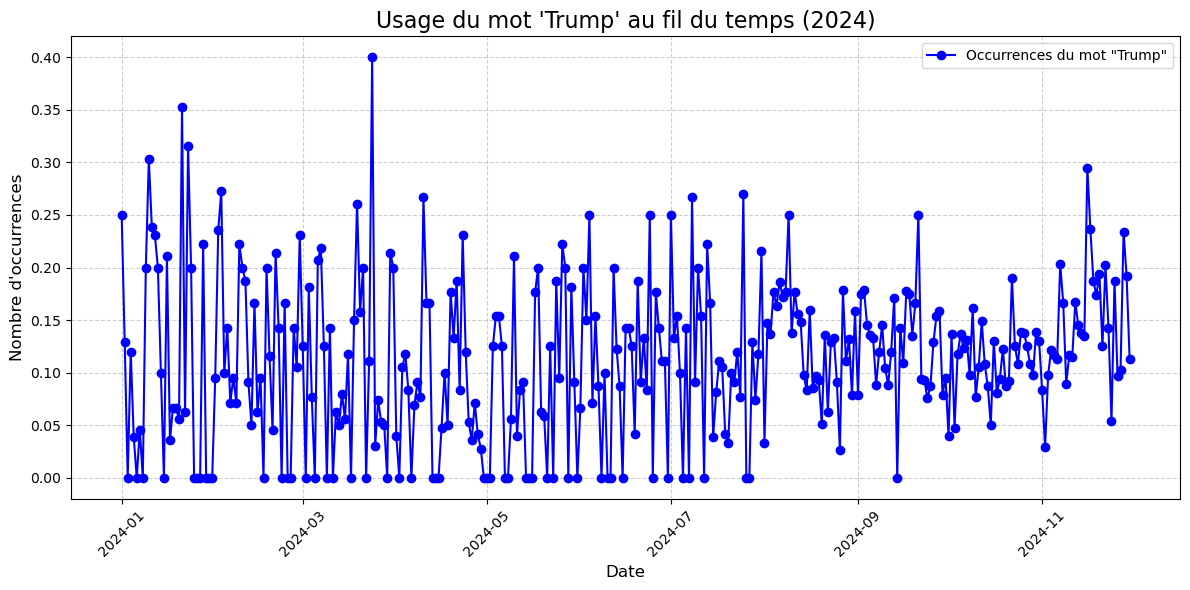

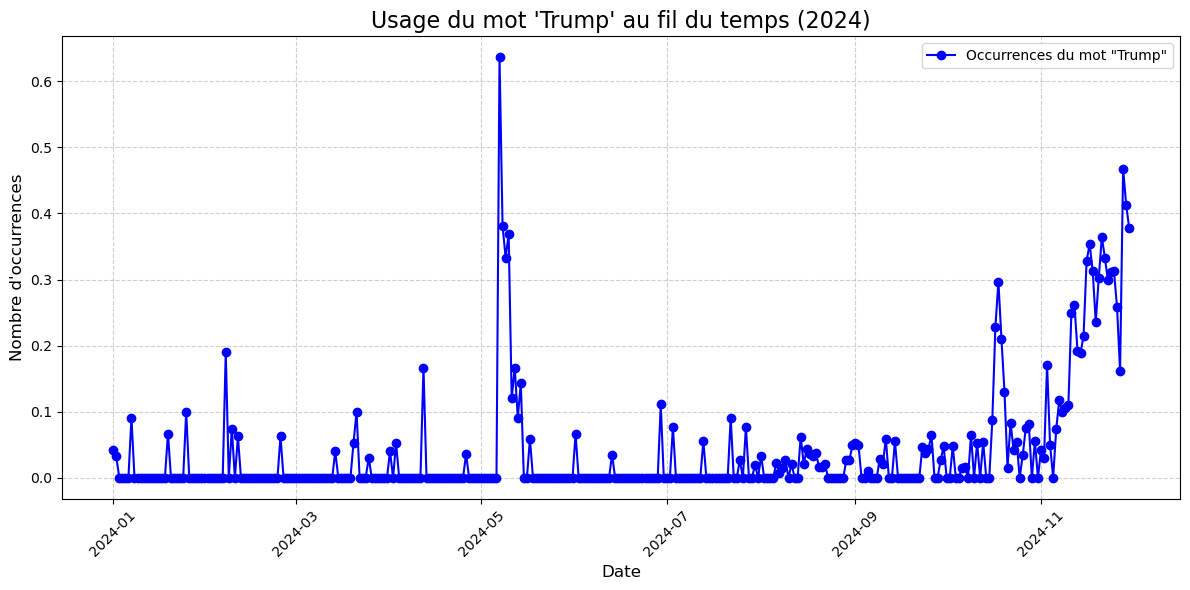

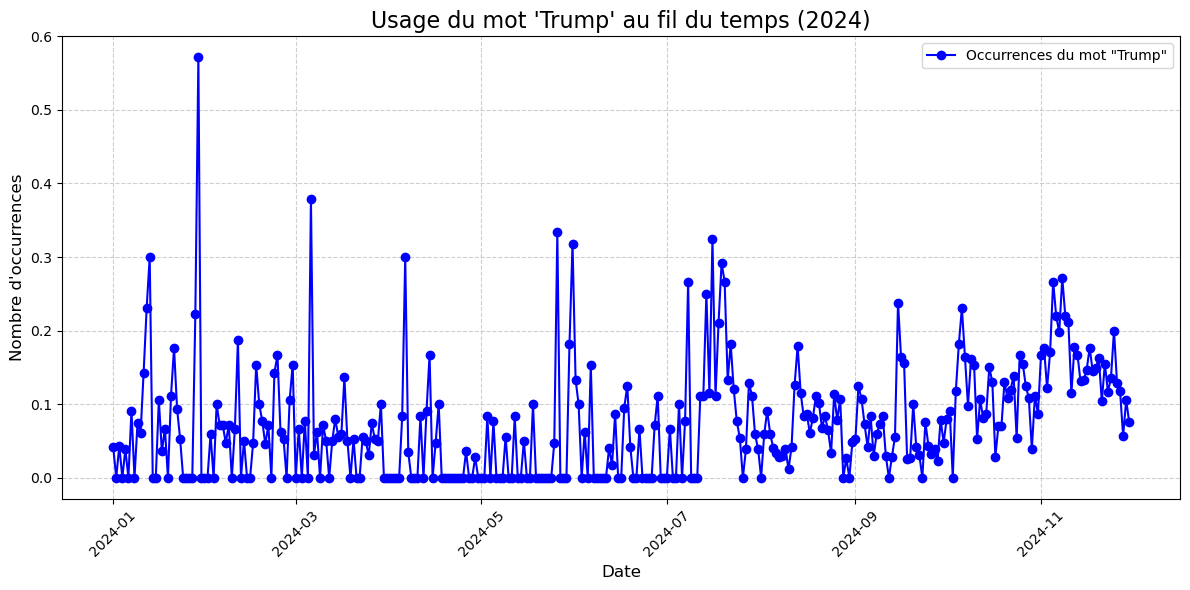

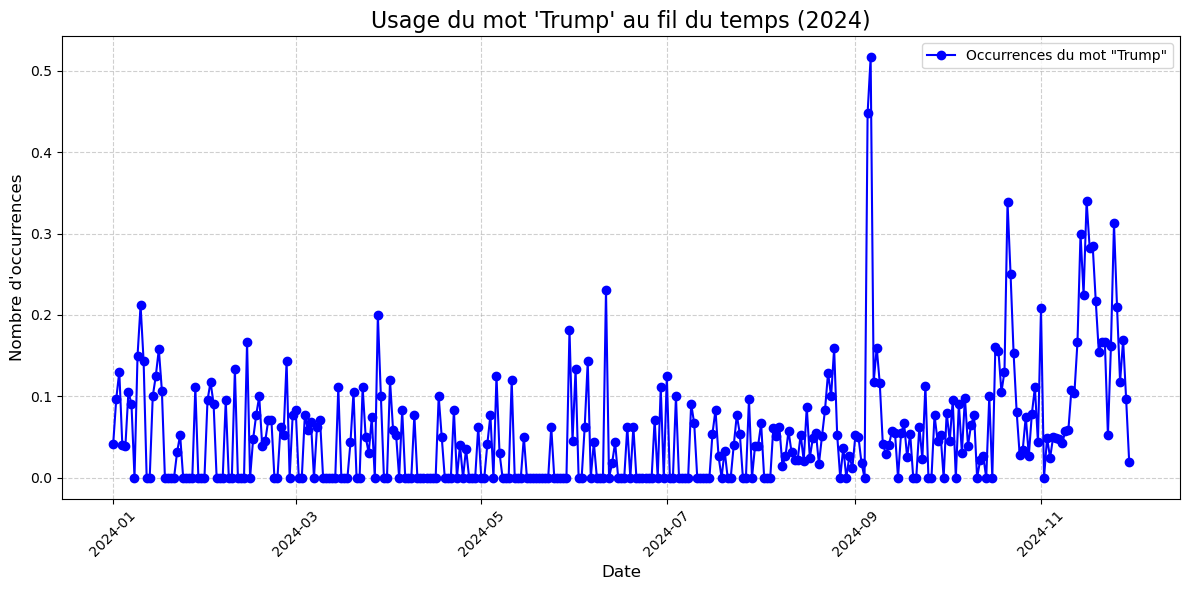

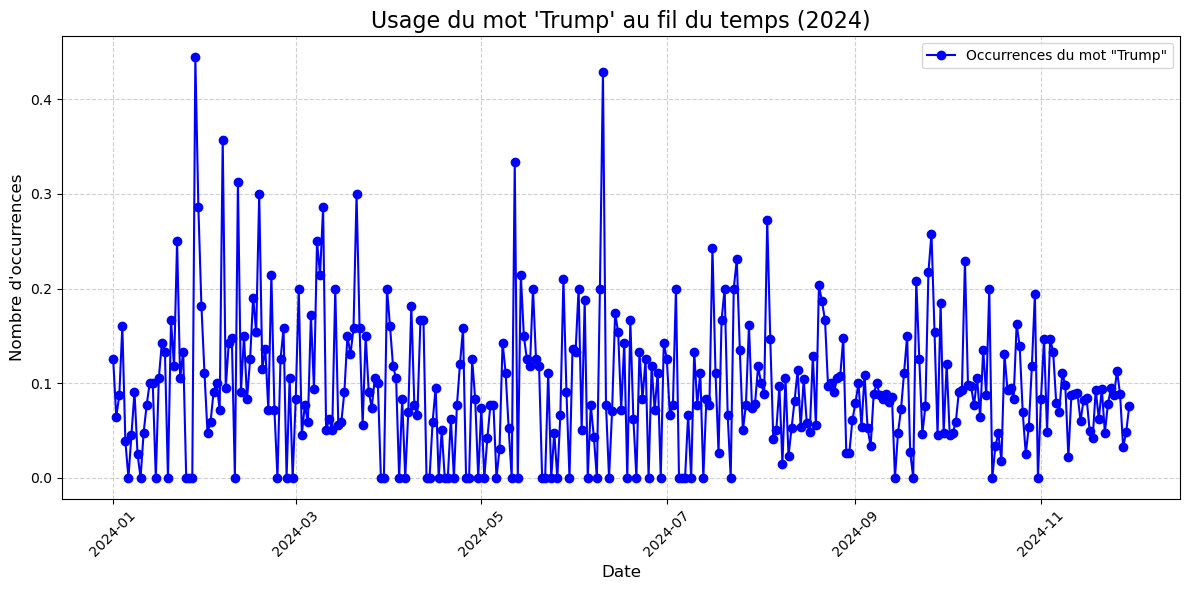

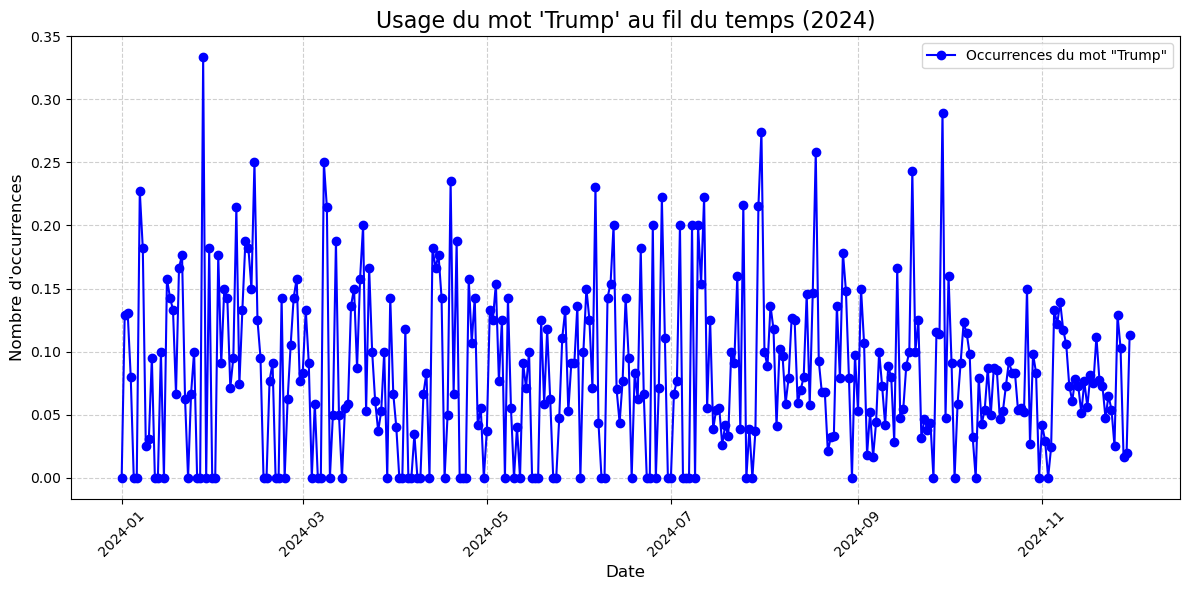

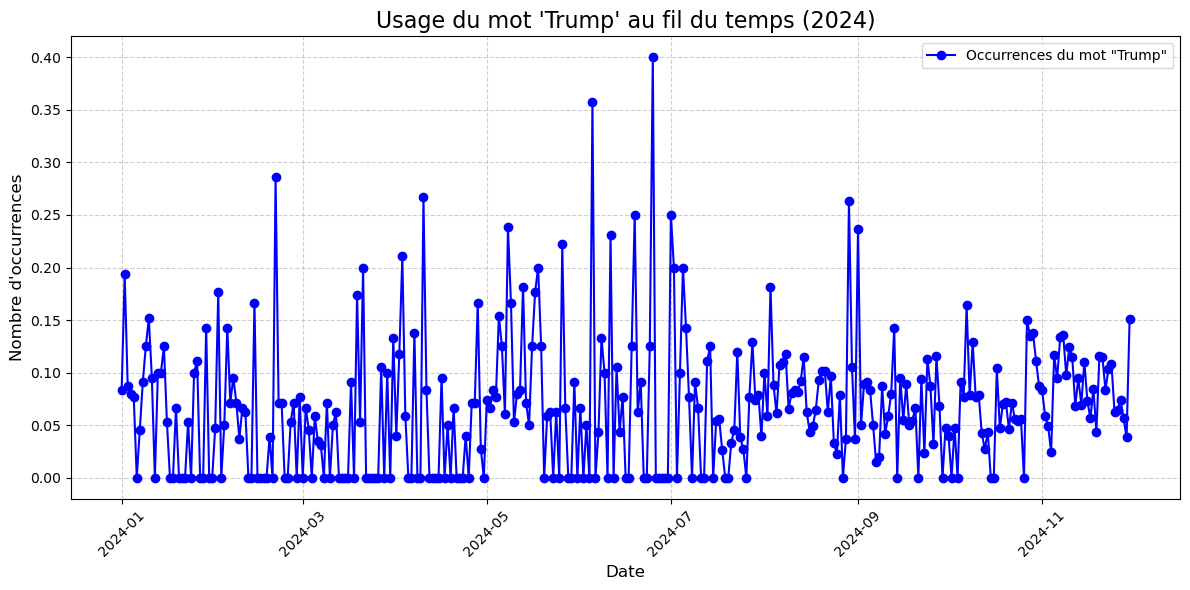

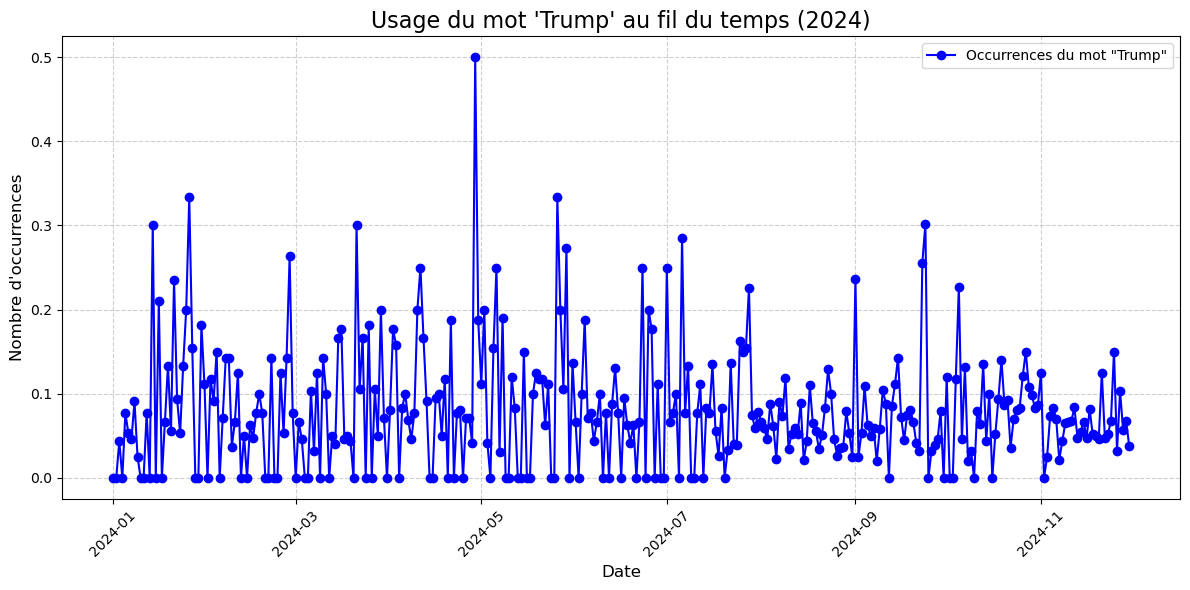

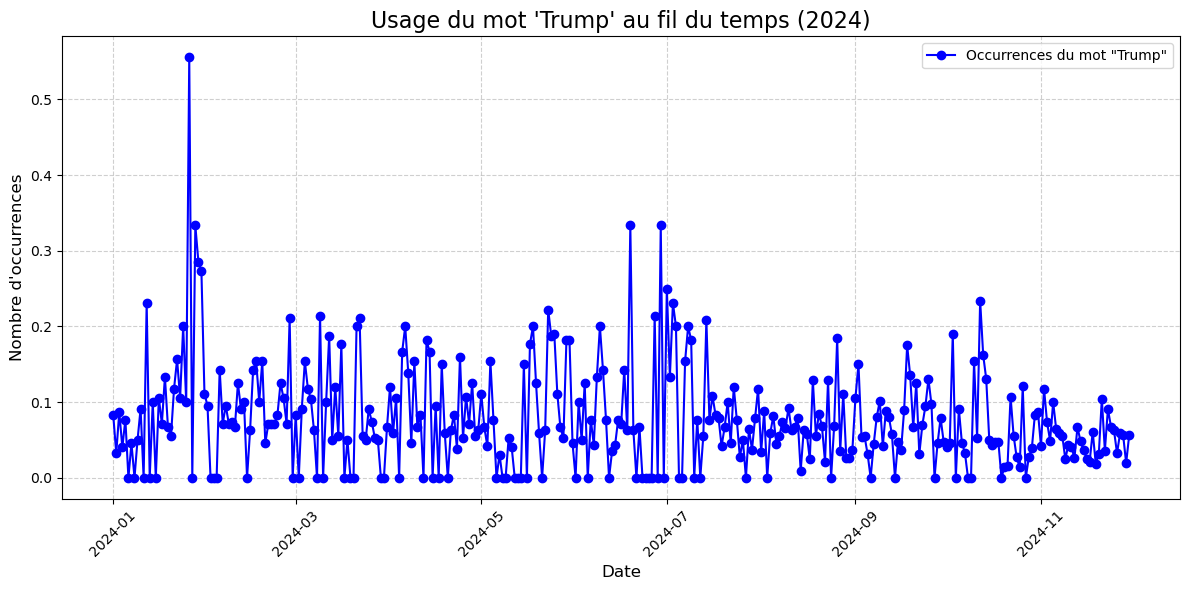

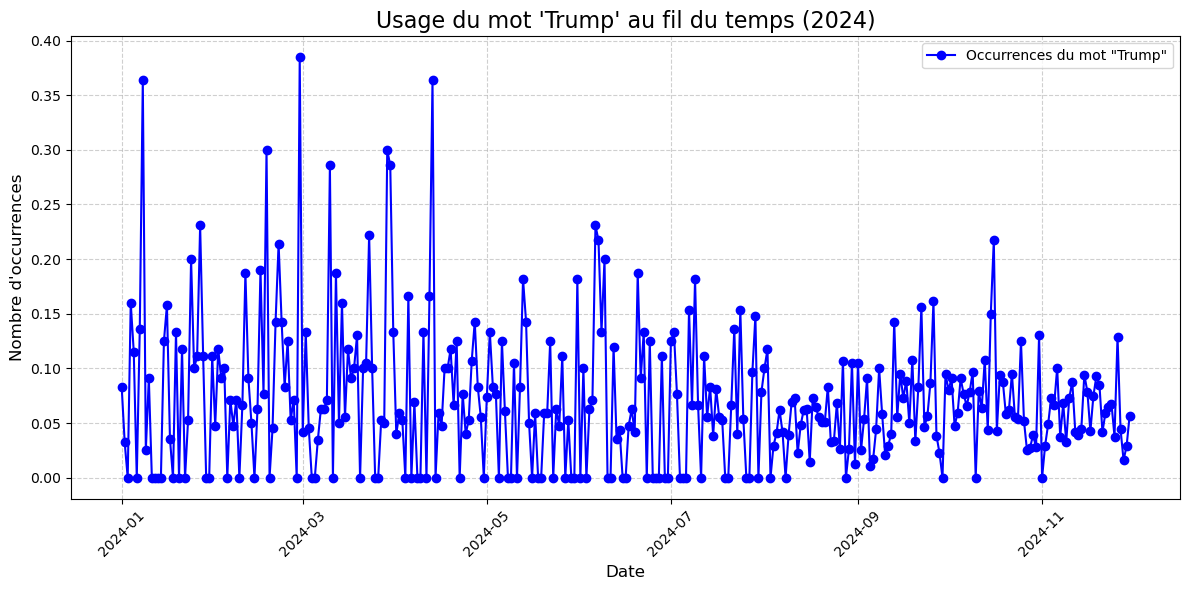

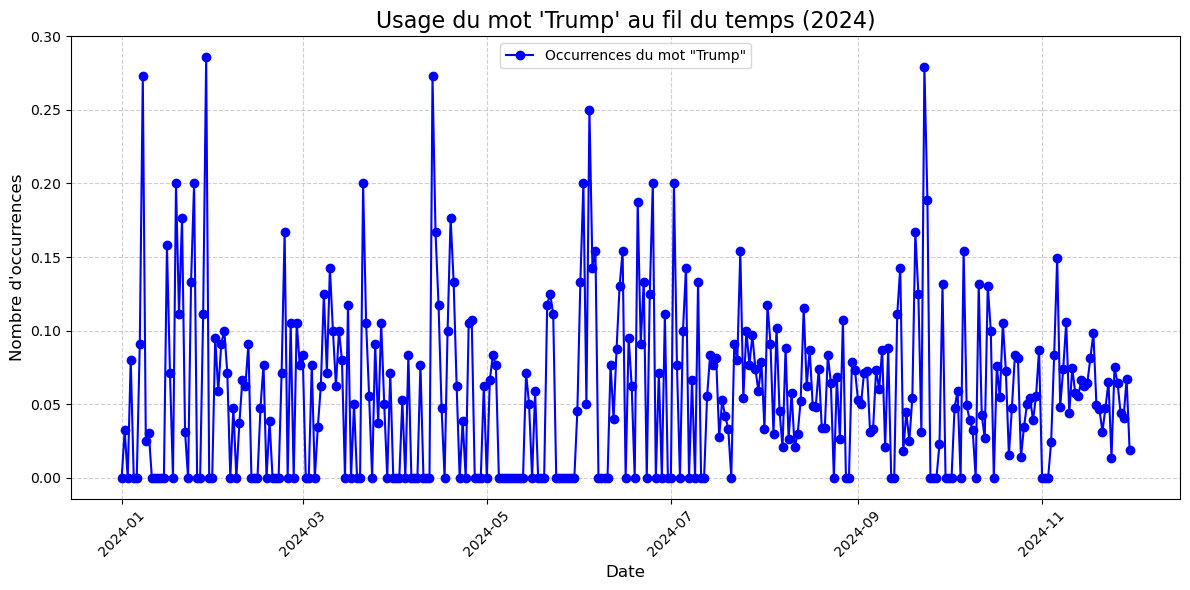

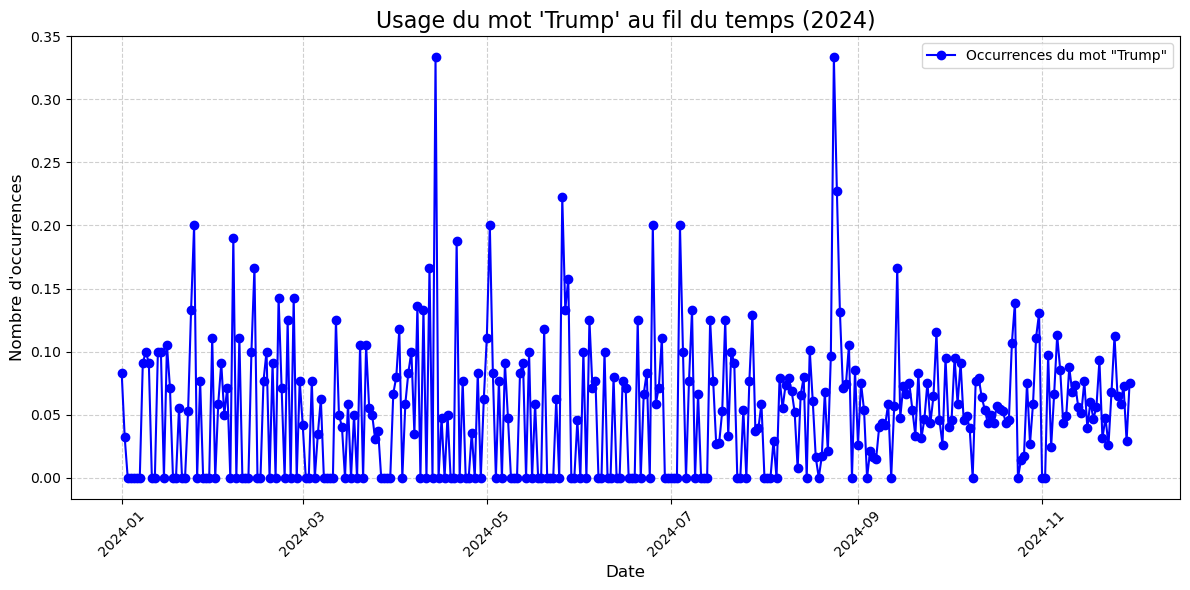

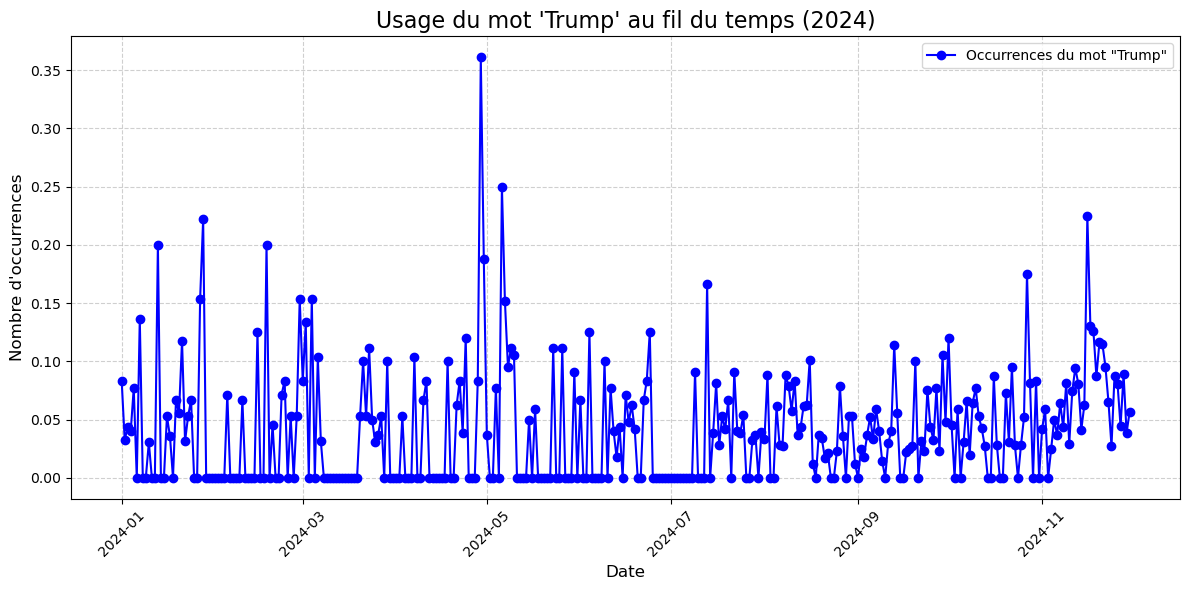

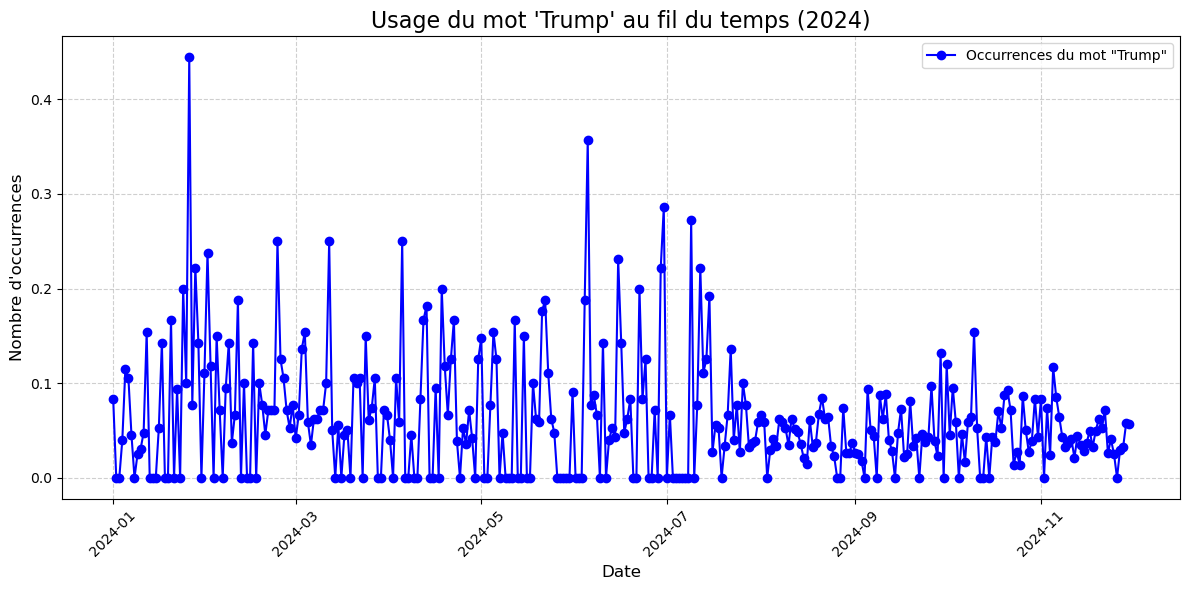

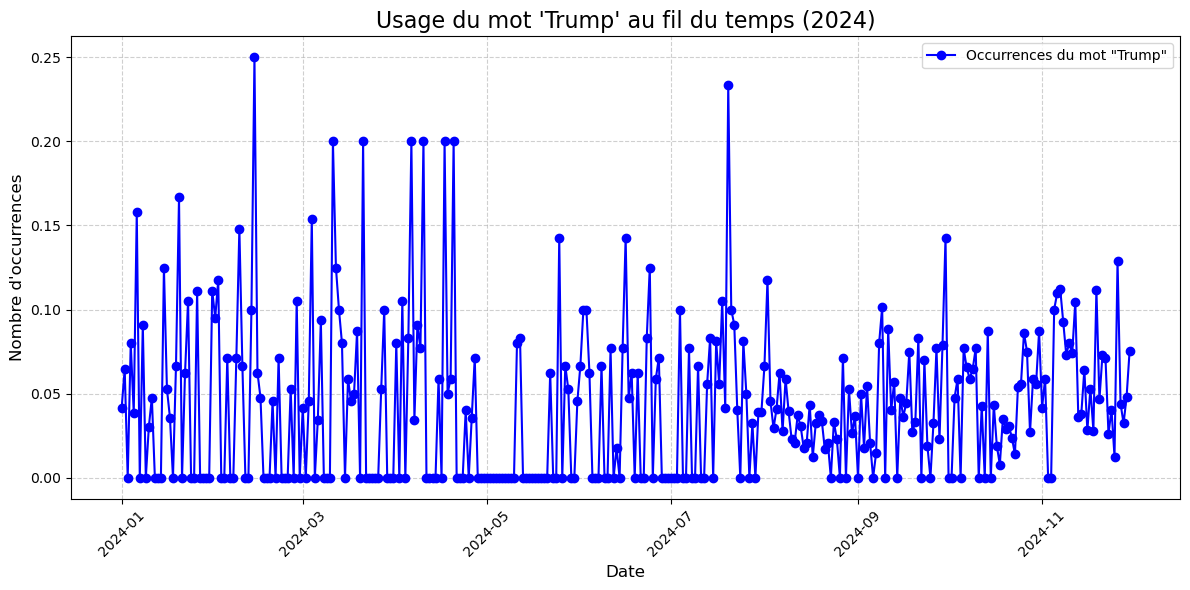

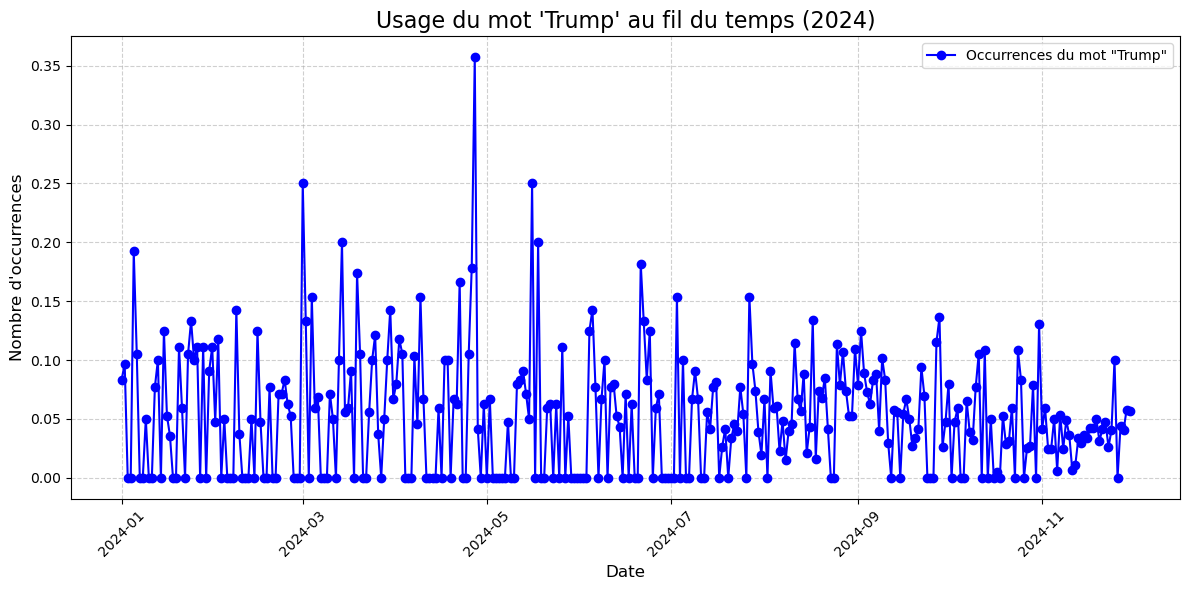

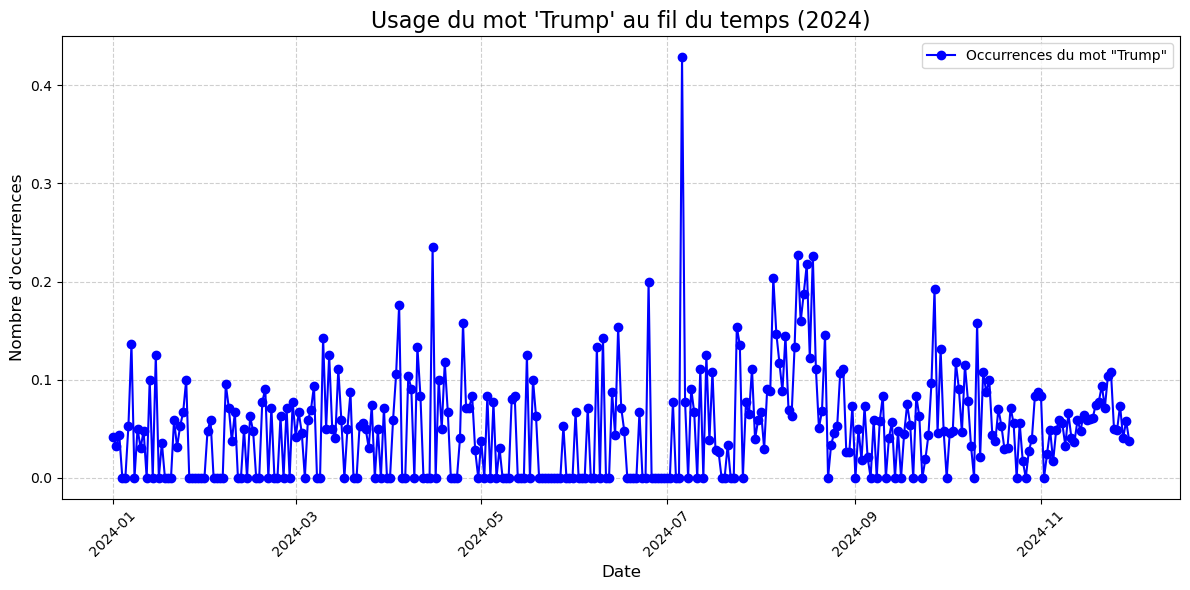

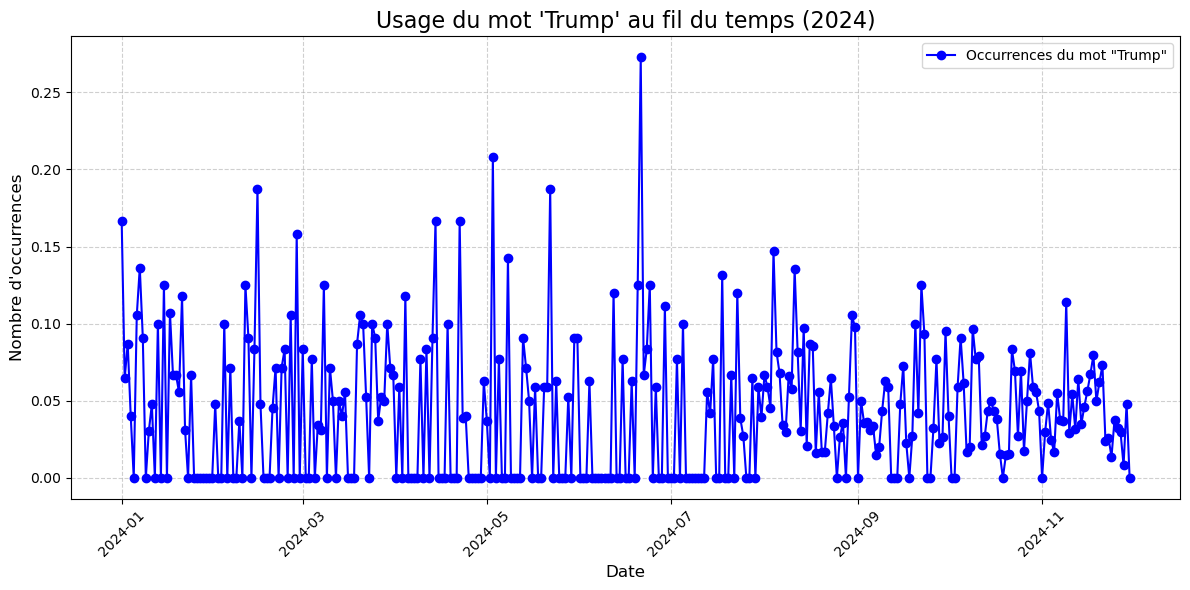

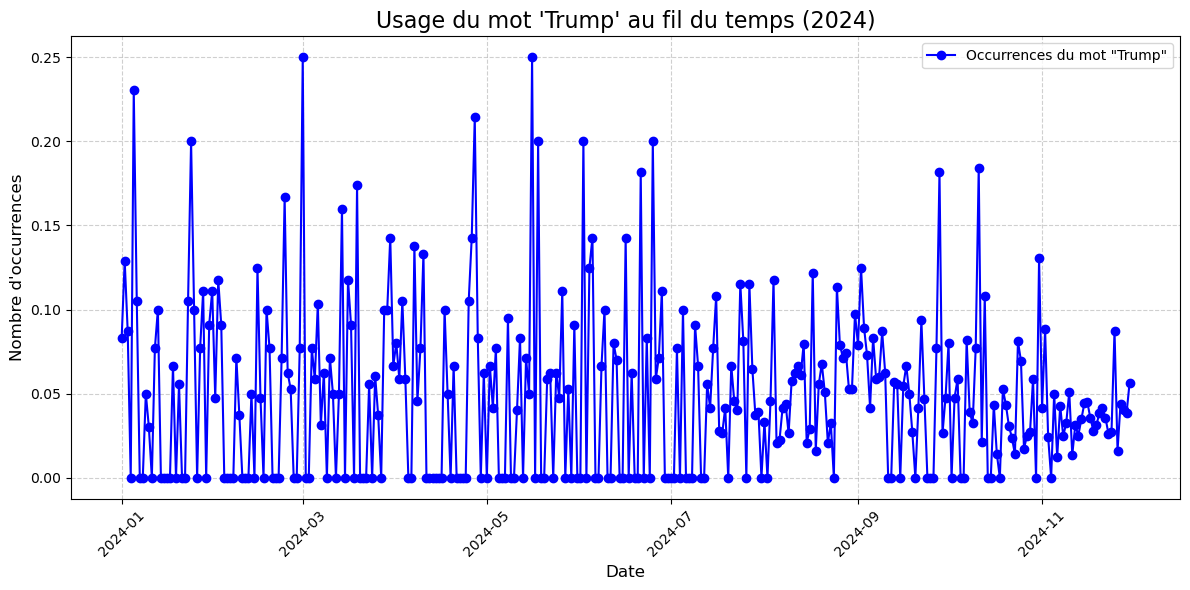

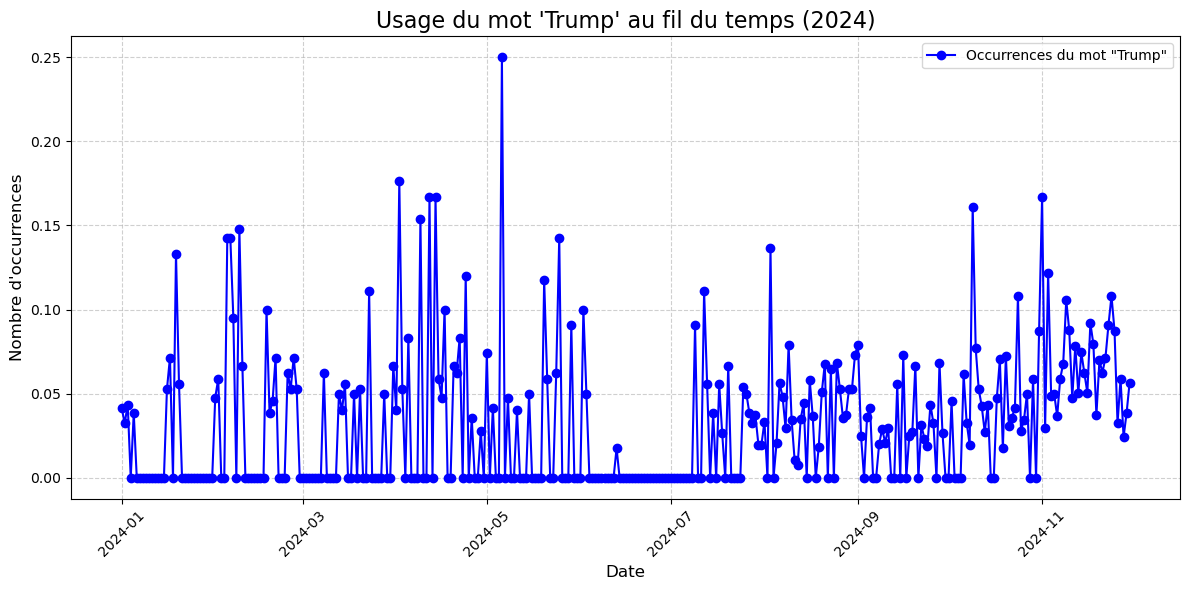

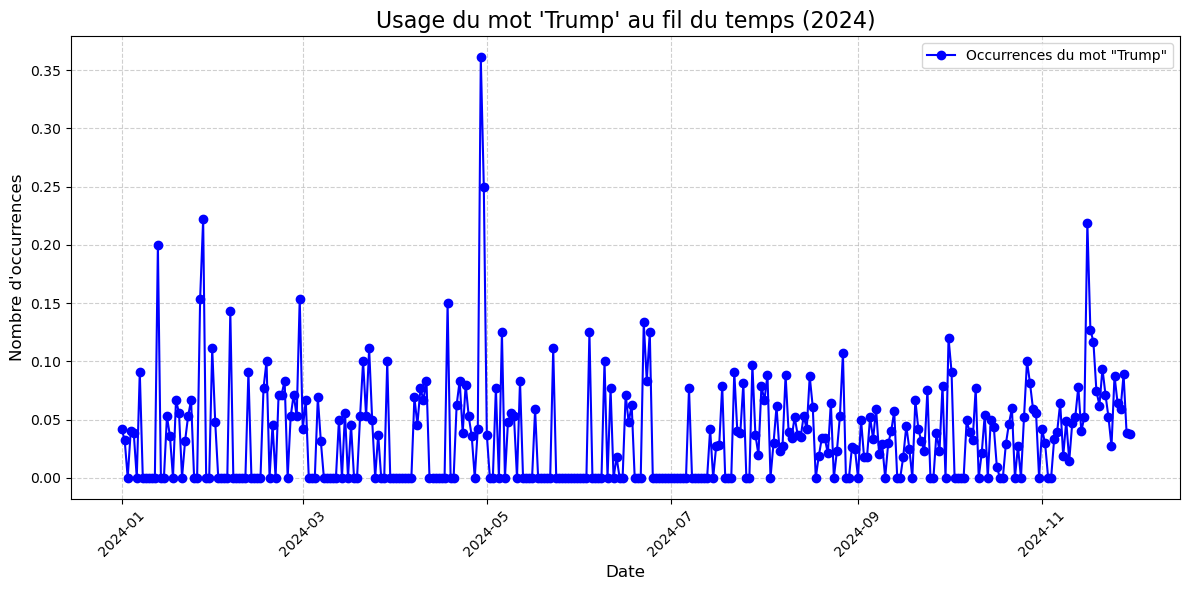

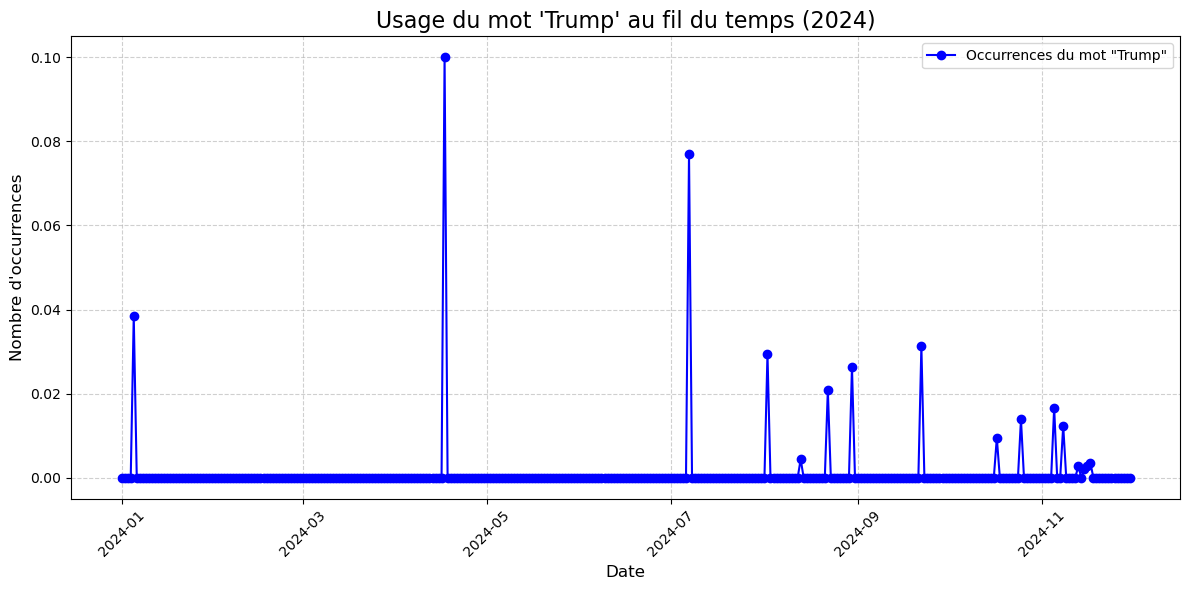

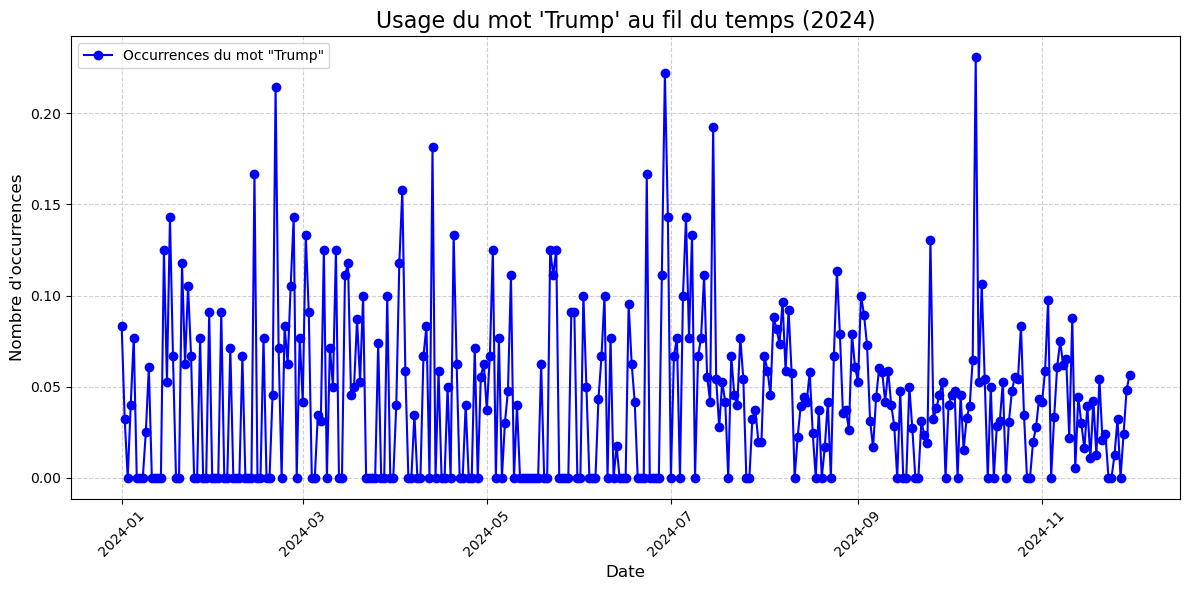

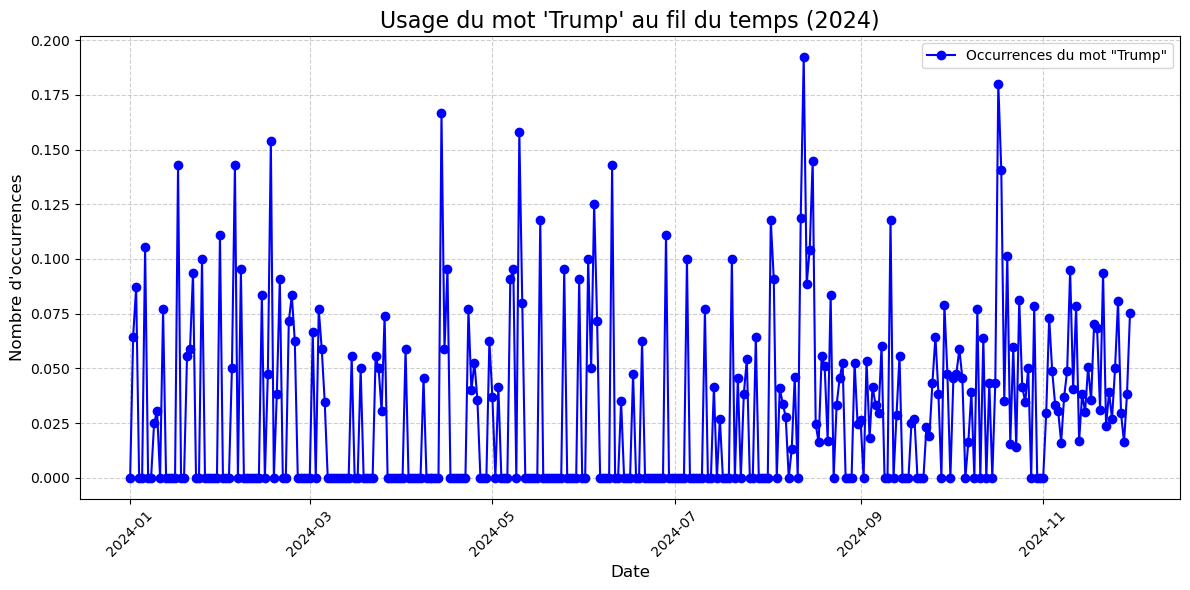

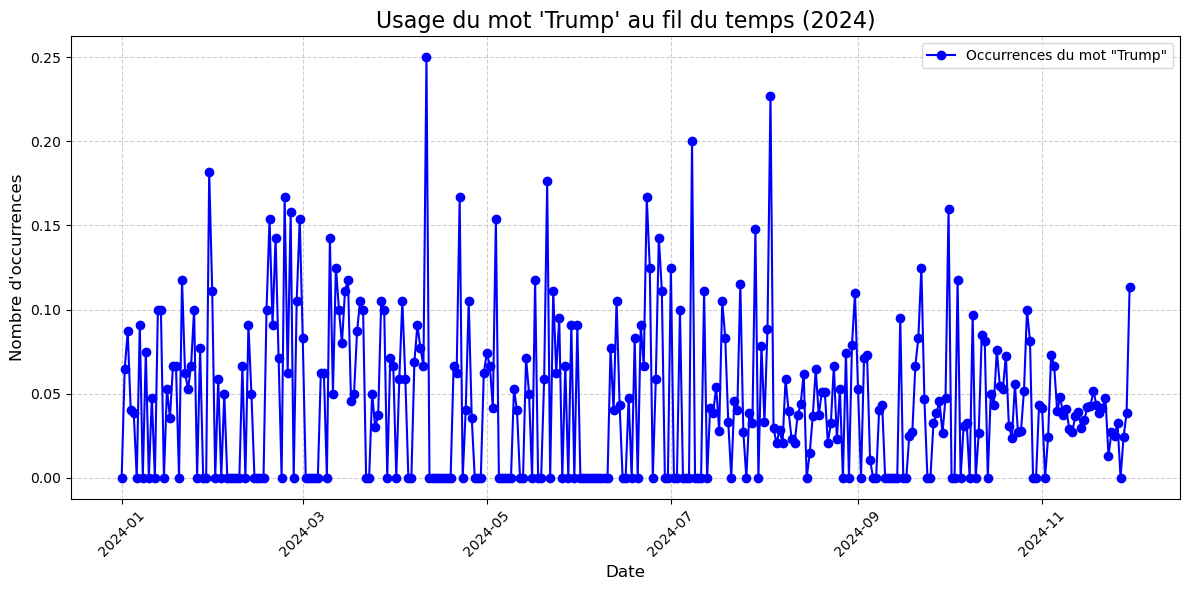

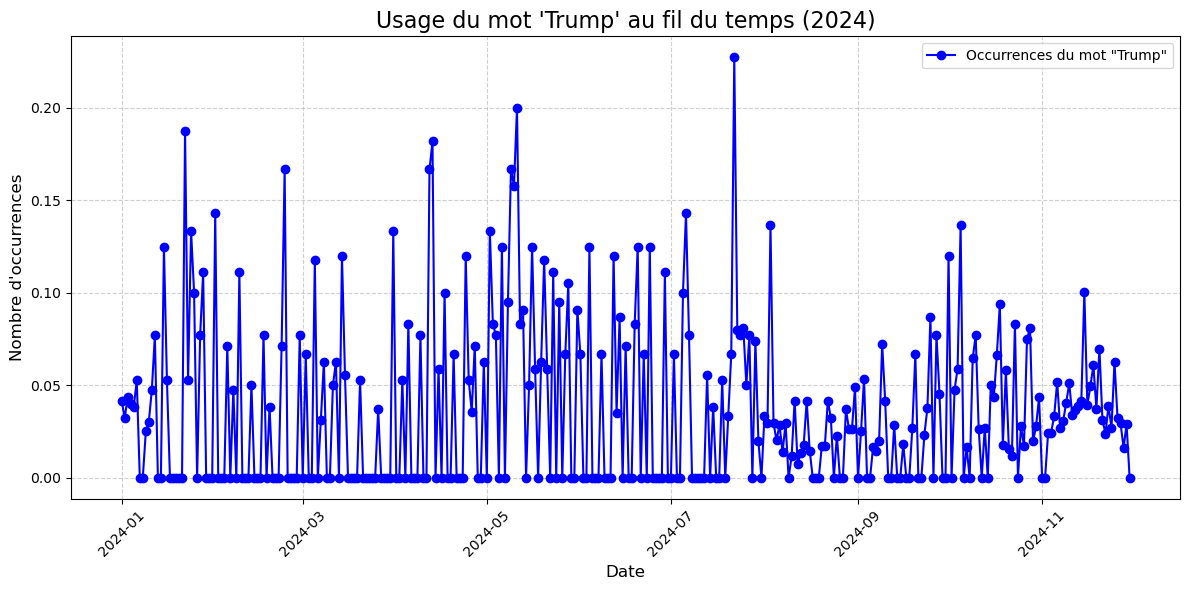

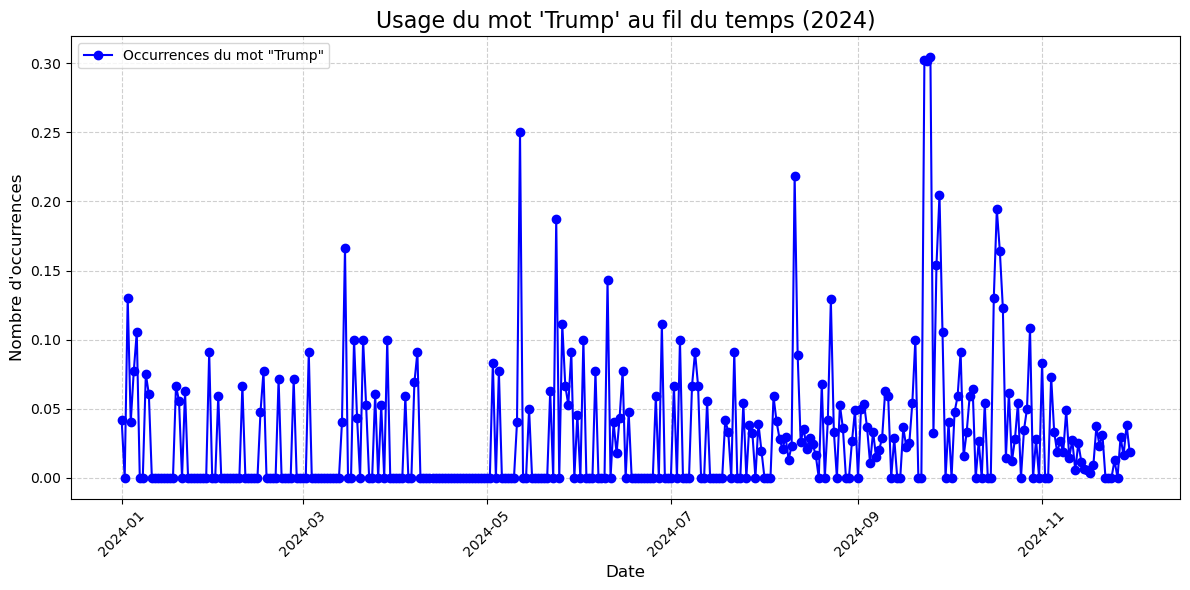

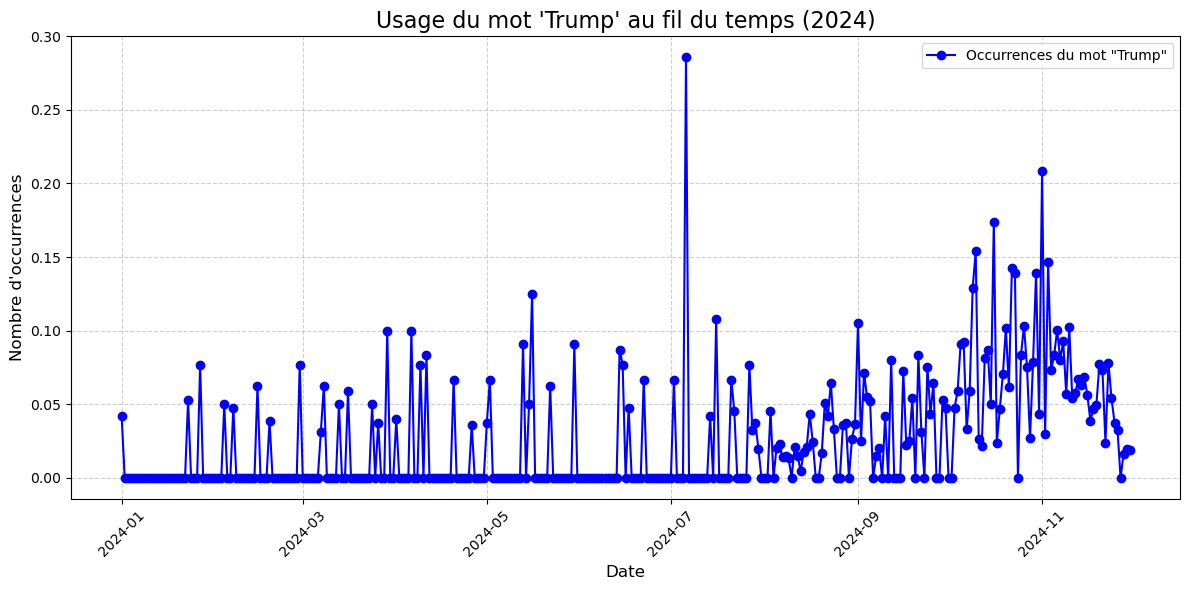

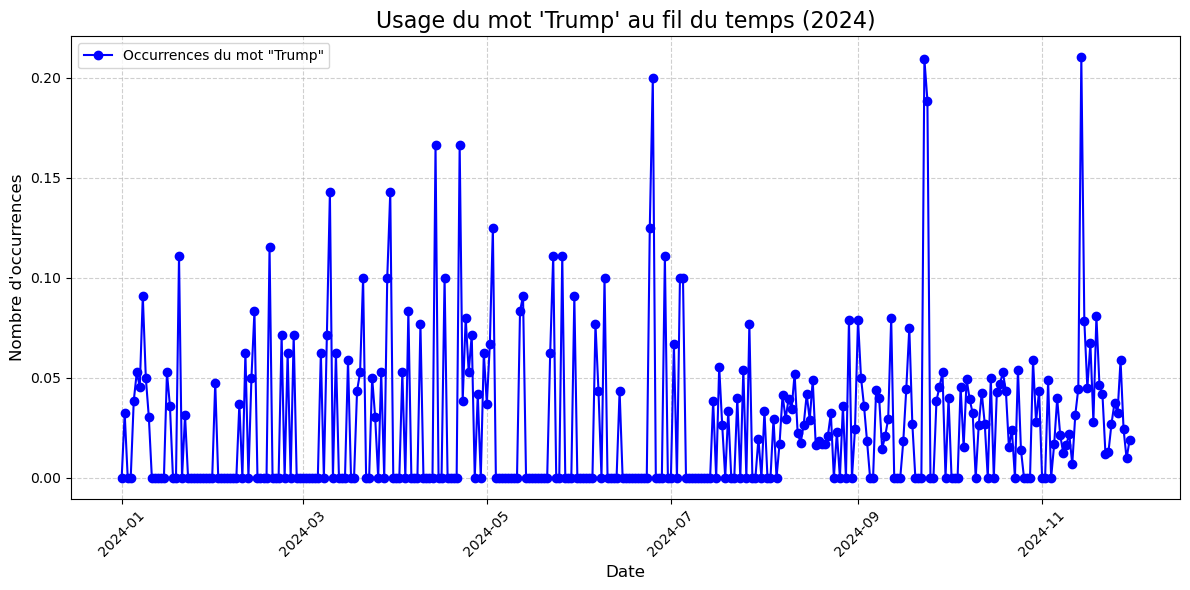

In [29]:
for word in fd['Word']:
    mot_cle = word
    df_date['mention'] = df_date['tokens'].apply(lambda tokens: mot_cle in tokens)
    total_tweets = df_date.groupby(df_date['ConvertedDate'].dt.date).size()
    occurrences = df_date[df_date['mention']].groupby(df_date['ConvertedDate'].dt.date).size()
    all_days = pd.date_range(start='2024-01-01', end='2024-11-30')
    occurrences = occurrences.reindex(all_days, fill_value=0)
    proportion = occurrences / total_tweets

    proportion = proportion.reindex(all_days, fill_value=0)

    plt.figure(figsize=(12, 6))
    plt.plot(proportion.index, proportion.values, marker='o', linestyle='-', color='blue', label='Occurrences du mot "Trump"')

# Ajouter des titres et légendes
    plt.title("Usage du mot 'Trump' au fil du temps (2024)", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Nombre d'occurrences", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45)  # Incliner les dates pour une meilleure lisibilité
    plt.legend()
    plt.tight_layout()
    plt.show()